<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/impactSpeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining the Impact Speed of a Falling Object

This notebook calculates the impact speed of an object falling vertically from rest.

**Assumptions:**

* The object is subject to a linear drag force.
* The object is falling vertically.
* The object is dropped from rest (initial velocity is 0).

In [1]:
# Import necessary libraries
import numpy as np  # Fundamental library for numerical computations, provides tools for working with arrays, matrices, and mathematical functions
from scipy import optimize  # Provides advanced scientific computing capabilities, including optimization algorithms

# Import libraries for plotting
import matplotlib as mpl  # Primary plotting library in Python
import matplotlib.pyplot as plt  # Provides a convenient interface for creating various types of plots
from matplotlib.legend_handler import HandlerLine2D  # Used to customize the appearance of lines in the legend of a plot

# Set default plot parameters
mpl.rcParams['figure.figsize'] = (16,10)  # Set default figure size to 16 inches wide and 10 inches tall
mpl.rcParams['font.size'] = 18  # Set default font size for plot elements to 18 points
mpl.rcParams['legend.fontsize'] = 14  # Set default font size for the legend to 14 points

# Exercise:

Evaluate the impact speed a polypropylene ball hitting the floor if dropped from rest at a height of 10m.
The diameter of ball is d=0.001m


### Equation of motion



Assuming up direction is defined as positive, the equation of motion is


$$m \frac{d v_y}{dt}  =  - m g - b v_y $$

We can solve this equation analytically, with the initial condition that the projectile is launched from rest at a height, $h$ at time $t=0$

$$v_y(t) = v_{ter} \left( 1 - e^{-\frac{t}{\tau}} \right) $$

$$y(t) = h+ v_{ter}  \tau \left( 1 - e^{-\frac{t}{\tau}} \right) - v_{ter} t$$

where the terminal speed, $ v_{ter}= \frac{mg}{b}$ and the characteristic time, $\tau= \frac{m}{b}$


In [3]:
# input parameters
ballDiameter =0.001 # in meter
g= 9.8 # in m/s^2
beta= 1.6*10**(-4) # in N*s/m^2
b= beta* ballDiameter; # drag coefficient
density= 946 # in kg/m^3
ballMass = density*np.pi*(ballDiameter**3)/6
terminalSpeed= ballMass*g/b # in m/s
characteristicTime= terminalSpeed/g; # in seconds
fallHeight = 10; # in meters

In [4]:
# define some functions for the vertical position abd the vertical velocity
def verticalPosition(t, height):
    y= height + terminalSpeed*characteristicTime*(1-np.exp(-t/characteristicTime)) - terminalSpeed*t
    return y

def verticalVelocity(t):
    v= terminalSpeed*(1-np.exp(-t/characteristicTime))
    return v

## Solve numerically for fall time


The scipy library has a numerical solver called fsolve.
Given a function $f(x)$ and an initial guess $x_0$ it will attempt to find the root
$f(x)=0$. It returns the solution in an array

In [5]:
# fsolve solve for the root of a function in our case (verticalPosition(t)=0)
# use 1.4 seconds as an initial guess

fallTime=optimize.fsolve(verticalPosition, 1.4, args=(fallHeight))

print('fallTime in seconds =', fallTime[0])

fallTime in seconds = 1.5474252922673417


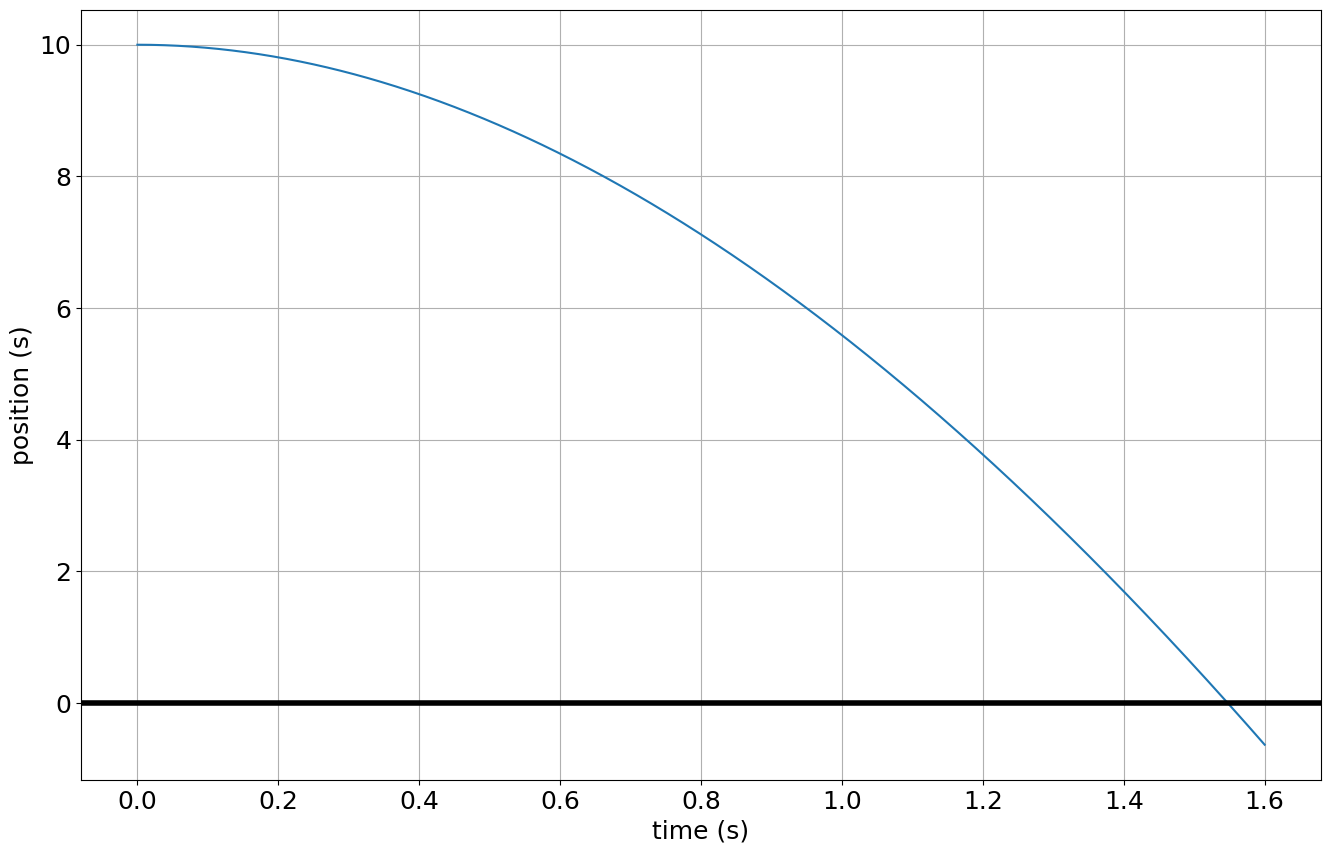

In [6]:
# visual look
t=np.linspace(0, 1.6, 1000)  # Create an array of 1000 time points between 0 and 1.6 seconds
y=verticalPosition(t,fallHeight)  # Calculate the vertical position for each time point using the verticalPosition function
plt.plot(t,y)  # Plot the vertical position (y) as a function of time (t)

plt.axhline(y=0, linewidth=4, color = 'k') #  Draw a horizontal line at y=0 to represent the ground

plt.xlabel('time (s)')  # Label the x-axis as "time (s)"
plt.ylabel('position (s)')  # Label the y-axis as "position (s)"
plt.grid()  # Add a grid to the plot for better readability
plt.show()  # Display the plot

In [14]:
impactSpeed= np.abs(verticalVelocity(fallTime[0]))

In [15]:
noDragImpactSpeed= np.sqrt(2*g*fallHeight)  # impact speed for object falling with no drag

In [16]:
print(f"Impact Speed: with drag = {impactSpeed:.2f} m/s, without drag = {noDragImpactSpeed:.2f} m/s")

Impact Speed: with drag = 11.93 m/s, without drag = 14.00 m/s


In [19]:
print(f"Terminal Speed = {terminalSpeed:.2f} m/s, Characteristic Time = {characteristicTime:.2f} s ")

Terminal Speed = 30.34 m/s, Characteristic Time = 3.10 s 


## Extra


Let's use the power of the python to solve for the impact speed for a given height and plot the result to compare with the impact speed when no air resistance is present.

In [11]:
# impact speed as a function of height
def impactSpeed(h):
    """
    Returns the impact speed as a function of height
    Assumes the object falls from rest
    """
    timeGuess=np.sqrt(2*h/g)
    fallTime=optimize.fsolve(verticalPosition, timeGuess, args=h)
    speed= np.abs(verticalVelocity(fallTime[0]))
    return speed

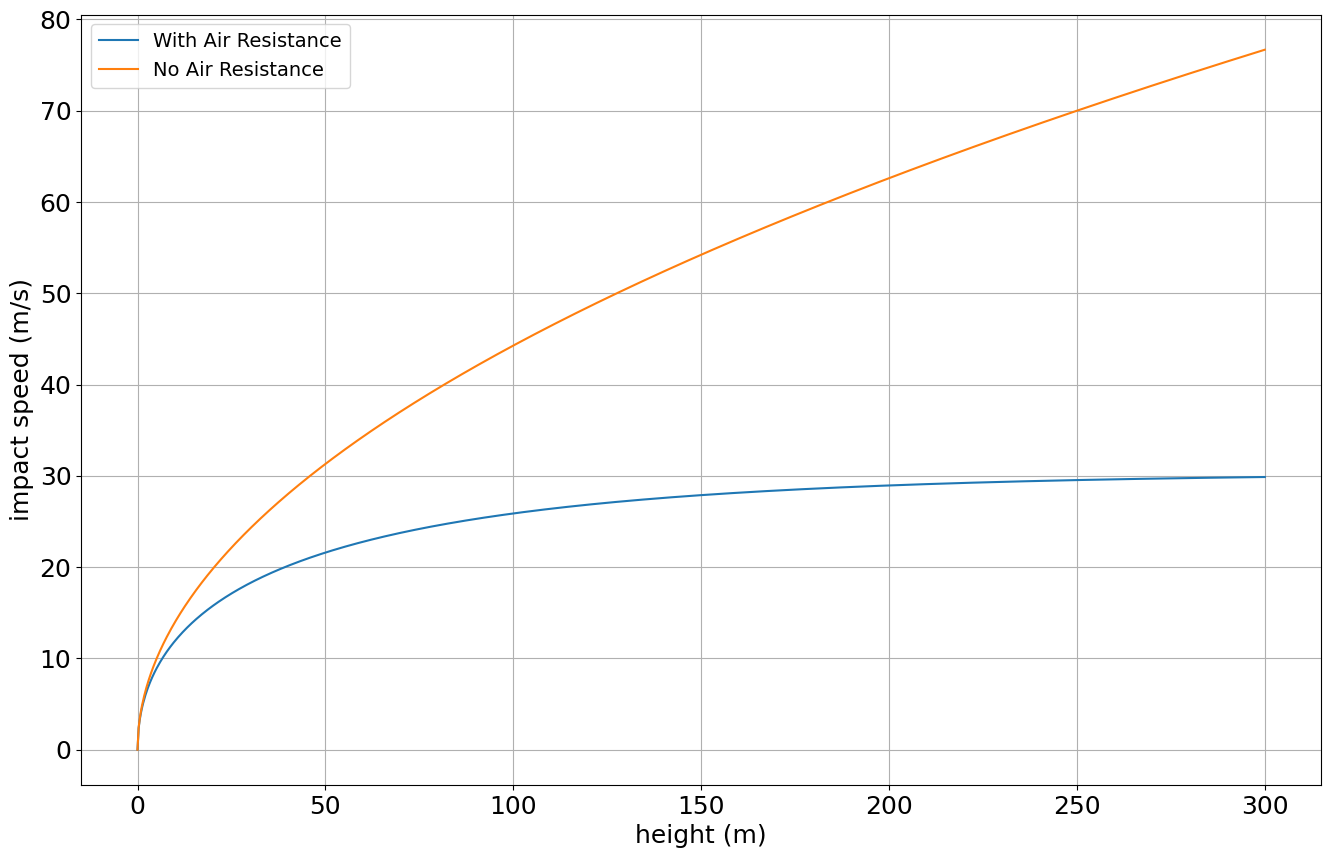

In [12]:
# impact speed for various height
height=np.linspace(0, 300, 1000);
speed= [impactSpeed(h) for h in height]
noDragSpeed= np.sqrt(2*height*g)

line1, = plt.plot(height,speed, label='With Air Resistance')
line2, = plt.plot(height,noDragSpeed, label='No Air Resistance')
plt.legend(handler_map={line1: HandlerLine2D()})
plt.xlabel('height (m)')
plt.ylabel('impact speed (m/s)')


plt.grid()
plt.show()